# Combining & organizing data

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import fnmatch

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_03


## Importing the prepared rental apartments data

In [2]:
# Read data to pandas data frame
df_orig = pd.read_csv('apartments_data_prepared.csv', 
                      sep=',', 
                      encoding='utf-8')

# Copy of data with selected colums
columns = [ 'web-scraper-order', 
            'address_raw',
            'rooms', 
            'area', 
            'luxurious',
            'price',
            'price_per_m2']
df = df_orig[columns]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(865, 7)


,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,0,1850.0,28.46
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,0,4853.0,89.87
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,0,4335.0,88.47
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,0,3515.0,109.84


## Combining data from different sources

### Reading rental apartment data with geocoded addresses

In [3]:
# Meaning of variables
# lat: geographical latitude
# lon: geographical longitude
# bfs_number: official municipality id
# bfs_name: official municipality name

# Geocoded data (i.e. data with latitude and longitude)
df_geo = pd.read_csv('apartments_data_geocoded.csv', 
                     sep=',', 
                     encoding='utf-8')

# Rename columns
df_geo = df_geo.rename(columns={'web-scrape':'web-scraper-order',
                                'address_ra':'address_raw',
                                'BFS_NUMMER':'bfs_number', 
                                'NAME':'bfs_name'})

# Show data
df_geo[['web-scraper-order',
        'address_raw',
        'lat', 
        'lon', 
        'bfs_number', 
        'bfs_name']].head()

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH)
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",47.513332,8.474851,88,Neerach
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",47.370792,8.514748,261,Zürich
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",47.407925,8.392561,243,Dietikon


### Join geo-information to rental apartment data using .merge()

In [4]:
df2 = df.merge(df_geo[['web-scraper-order', 
                       'lat', 
                       'lon', 
                       'bfs_number', 
                       'bfs_name']], 
               on="web-scraper-order")
df2.head()

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41,47.252171,8.845797,118,Rüti (ZH)
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,0,1850.0,28.46,47.513332,8.474851,88,Neerach
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,0,4335.0,88.47,47.370792,8.514748,261,Zürich
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,0,3515.0,109.84,47.362282,8.522193,261,Zürich
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",3.5,105.0,0,3200.0,30.48,47.407925,8.392561,243,Dietikon


### Reading municipality-level data

In [5]:
# Meaning of variables:
# bfs_number: official municipality id
# bfs_name: official municipality name
# pop: number of residents (=population)
# pop_dens: population density (pop per km2)
# frg_pct: percentage foreigners
# emp: numer of employees

df_municip = pd.read_excel('municipality_data.xlsx', 
                           sheet_name='data_for_import')
df_municip.head(5)

,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income
0,1,Aeugst am Albis,1981,250.442478,14.184755,442.0,NaN
1,2,Affoltern am Albis,12303,1161.756374,28.700317,6920.0,NaN
2,3,Bonstetten,5572,749.932705,16.564968,1014.0,NaN
3,4,Hausen am Albis,3751,275.808824,16.022394,1021.0,NaN
4,5,Hedingen,3778,578.560490,16.410799,1478.0,NaN


### Join municipality data to rental apartment data using .merge()

In [6]:
df3 = df2.merge(df_municip[['bfs_number', 
                            'pop', 
                            'pop_dens', 
                            'frg_pct', 
                            'emp', 
                            'mean_taxable_income']], 
                 on="bfs_number",)
               
df3.head(5)

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053.0,NaN
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,0,1850.0,28.46,47.513332,8.474851,88,Neerach,3175,525.662252,13.322835,641.0,NaN
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,0,4335.0,88.47,47.370792,8.514748,261,Zürich,420217,4778.994655,32.458468,491193.0,NaN
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,0,3515.0,109.84,47.362282,8.522193,261,Zürich,420217,4778.994655,32.458468,491193.0,NaN
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",3.5,105.0,0,3200.0,30.48,47.407925,8.392561,243,Dietikon,27746,2970.663812,46.226483,18911.0,NaN


### Export data to file

In [7]:
# Remove missing values which may have ocured from the merging process
df3 = df3.dropna()

# Check for missing values per column
print(df3.isna().sum())

# Count number of rows and columns
print(df3.shape)

# Export apartment data to file
df3.to_csv('apartments_data_enriched.csv',
            sep=',',
            encoding='utf-8')

web-scraper-order      0
address_raw            0
rooms                  0
area                   0
luxurious              0
price                  0
price_per_m2           0
lat                    0
lon                    0
bfs_number             0
bfs_name               0
pop                    0
pop_dens               0
frg_pct                0
emp                    0
mean_taxable_income    0
dtype: int64
(0, 16)


### Sorting data

In [8]:
# Sorting data by 'price' and 'area' with highest price above (ascending=False)
df3.sort_values(by=['price', 'area'], 
                ascending=False).head()

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income


### Aggregation of data

In [9]:
# Aggregation using .groupby()
df3[['rooms', 'price']].groupby(['rooms']).mean()

,price
rooms,


## Reshaping data

### Reshaping data using .stack() and .unstack()

In [10]:
df_sub = df3[['bfs_name', 'rooms', 'price', 'area']][:5]
print('Original shape')
print(df_sub, '\n')

df_sub_stacked = df_sub.stack()
print('Stacked')
print(df_sub_stacked, '\n')

# Using unstack
print('Unstacked (= back to original shape)')
print(df_sub_stacked.unstack())

Original shape
Empty DataFrame
Columns: [bfs_name, rooms, price, area]
Index: [] 

Stacked
Series([], dtype: object) 

Unstacked (= back to original shape)
Empty DataFrame
Columns: []
Index: []


### Reshaping data using .melt()

In [11]:
df_sub = df3[['rooms', 'price', 'area']][:5]
print('Original shape')
print(df_sub, '\n')

print('Reshaped using .melt()')
print(pd.melt(df, id_vars=['rooms'], value_vars=['price', 'area']))

Original shape
Empty DataFrame
Columns: [rooms, price, area]
Index: [] 

Reshaped using .melt()
      rooms variable   value
0       3.0    price  1441.0
1       3.5    price  1850.0
2       2.0    price  4853.0
3       2.0    price  4335.0
4       2.0    price  3515.0
...     ...      ...     ...
1725    3.5     area    82.0
1726    4.0     area    73.0
1727    4.5     area   110.0
1728    3.0     area    68.0
1729    4.5     area   114.0

[1730 rows x 3 columns]


### Pivoting data using .pivot_table()

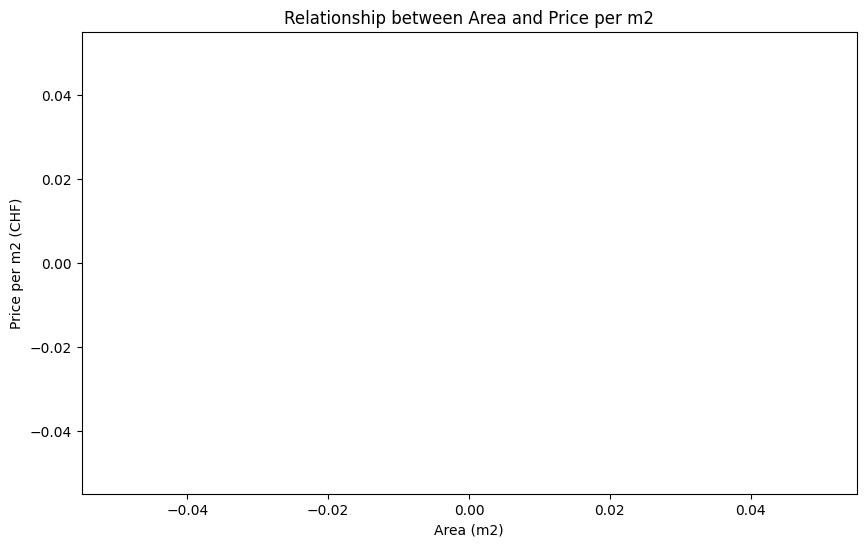

The scatter plot above shows the relationship between the area of the apartments and the price per square meter (price_per_m2).
From the plot, we can observe that there is a general trend where smaller apartments tend to have a higher price per square meter.
This can be explained by the fact that smaller apartments are often located in more central or desirable locations, where the cost per square meter is higher.
Additionally, smaller apartments may have higher demand relative to their supply, driving up the price per square meter.


In [12]:
import seaborn as sns

# Using pivot_table to reshape the data and calculate means 
# Using pivot_table to reshape the data and calculate means 
pivot_table = pd.pivot_table(df3[['rooms', 'price', 'area', 'price_per_m2']],
                             index=['rooms'],
                             values=['price', 'price_per_m2'],
                             aggfunc=(np.mean))

# Check relationship between area and price_per_m2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='area', y='price_per_m2')
plt.title('Relationship between Area and Price per m2')
plt.xlabel('Area (m2)')
plt.ylabel('Price per m2 (CHF)')
plt.show()


# Explanation
print("The scatter plot above shows the relationship between the area of the apartments and the price per square meter (price_per_m2).")
print("From the plot, we can observe that there is a general trend where smaller apartments tend to have a higher price per square meter.")
print("This can be explained by the fact that smaller apartments are often located in more central or desirable locations, where the cost per square meter is higher.")
print("Additionally, smaller apartments may have higher demand relative to their supply, driving up the price per square meter.")

## Pivot Table aggfunc=count

In [13]:
# Create a pivot table with count aggregation
pivot_table_count = pd.pivot_table(df3[['rooms', 'price', 'area', 'price_per_m2']],
                                   index=['rooms'],
                                   values=['price'],
                                   aggfunc='count')

# Display the pivot table
print(pivot_table_count)

# Description
print("\nThe pivot table above shows the distribution of the number of apartments based on the number of rooms.")
print("Each value represents the count of apartments for the corresponding number of rooms.")

Empty DataFrame
Columns: []
Index: []

The pivot table above shows the distribution of the number of apartments based on the number of rooms.
Each value represents the count of apartments for the corresponding number of rooms.


## Pivot Table values

In [14]:
# Create a pivot table with mean values per municipality
pivot_table_municipality = pd.pivot_table(df3,
                                          index='bfs_name',
                                          values=['rooms', 'area', 'price', 'price_per_m2'],
                                          aggfunc=np.mean)

# Sort the pivot table by price and area with the most expensive municipalities on top
pivot_table_municipality = pivot_table_municipality.sort_values(by=['price', 'area'], ascending=False)

# Display the pivot table
pivot_table_municipality.head()

KeyError: 'price'

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [13]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-08 11:33:57
Python Version: 3.11.10
-----------------------------------
